# Insurance Claim Fraud

In this project we have to create a model that can predict if an insurance is fraudulent or not.

## Loading Dataset

In [3]:
# importing required libraries
import pandas as pd   # for data wrangling

import numpy as np    # numerical python for arrays

import matplotlib.pyplot as plt    # for data visualization

import seaborn as sns     # for data visualization

import warnings     # to detect unnecessary warnings
warnings.filterwarnings('ignore')    # to ignore unnecessary warnings

In [4]:
# loading dataset
insurance = pd.read_csv('insurance_claim_fraud_detection.csv')

### Data analysis

#### Shape

In [5]:
# let's check the shape of dataframe
insurance.shape

(1000, 40)

*Dataset contains 1000 rows and 40 columns.*

#### Overview

*As we have seen there are 40 columns in the dataset so, it may possible that when we load the dataset it will not show all columns.*

In [8]:
# setting pandas option to see all columns
pd.set_option('display.max_columns', None)

In [9]:
# let's load first 15 rows of dataset to take an overview of it
insurance.head(15)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


*Here we can see there are NaN values in column _c39 we will check data types and total NaN values and to the steps accordingly.*

#### Data Type

In [10]:
# checking data types that all column contains
insurance.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

*Some column contains object and some contains numeric data types. Here we can see there are two columns 'incident_date' and 'policy_bind_date' contains date type variable but here it is showing object type.*

#### Null values

In [12]:
# checking if there is any null value present in dataset
insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

*Here we can see column '_c39' contains 1000 null values that is the total row count of dataset that means column 'c_39' contains all null values. We have seen columns 'incident_date' and 'policy_bind_date' is showing object data type but it contains date.*

In [15]:
# let's check if there is any blank space present in 'incident_date' column
insurance.loc[insurance['incident_date'] == ' ']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


In [18]:
# let's check if there is any blank space present in 'policy_bind_date' columns
insurance.loc[insurance['policy_bind_date'] == ' ']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


*Here we can see there is not any row present which contains blank space in both columns.*

#### Unique Features

*Let's check how many unique features present in object data type columns.*

In [16]:
# first let's make a list of columns which contains object data type
# we will use list concatenation to make the list
obj = [i for i in insurance.columns if insurance[i].dtype == 'O']

In [20]:
# now we will use for loop to find all unique features of every object data type column
for i in obj:
    uni = insurance[i].nunique()
    print('There are',uni,'unique values present in',i,'column.')

There are 951 unique values present in policy_bind_date column.
There are 3 unique values present in policy_state column.
There are 3 unique values present in policy_csl column.
There are 2 unique values present in insured_sex column.
There are 7 unique values present in insured_education_level column.
There are 14 unique values present in insured_occupation column.
There are 20 unique values present in insured_hobbies column.
There are 6 unique values present in insured_relationship column.
There are 60 unique values present in incident_date column.
There are 4 unique values present in incident_type column.
There are 4 unique values present in collision_type column.
There are 4 unique values present in incident_severity column.
There are 5 unique values present in authorities_contacted column.
There are 7 unique values present in incident_state column.
There are 7 unique values present in incident_city column.
There are 1000 unique values present in incident_location column.
There are

observations:
    
    1: There are 951 unique values present in 'policy_bind_date' which contains date.
        
    2: There are 60 unique values present in 'incident_date' column which also contains date.
        
    3: There are 1000 unique values present in 'incident_location' column which contains location details where incident 
    happens and we have already seen there are total 1000 rows in the dataset that means location will not provide any 
    valued insight for the model. We can drop this column.

#### skewness

In [21]:
# checking skewness of numerical data
insurance.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

*Data are not very skewed only few columns contains highly skewed data.*

#### Statistical summary

In [30]:
# Let's check summary of numerical data
insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


observations:
    
    1: Most columns contains very high standard deviation.
        
    2: In some columns mean is greater than median.
        
    3: The maximum capital loss is 0 due to insurance claim that means there is no loss and minimum loss is 111100 that 
    means the company needed to pay maximum 111100 for the insurance claim.
        
    4: There is a huge difference between 75th percentile and maximum value in some columns this raises a chance of outliers but also there is high standard deviation so we need to check for that.

In [31]:
# Let's check statistical summary of object data
insurance.describe(include = 'O')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,01-01-2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


Observations:
    
    1: All columns are showing 1000 count means there is no null value present in data.
        
    2: There are two columns which contains date but showing as object data type.
        
    3: There are 1000 rows and 1000 different location data is present that means it will not be able to provide any 
    valuable insight to the model.
        
    4: There are two unique feature present in target column from which 753 rows contains same type of unique feature and as we know there are total 1000 rows in the data set that means dataset is imbalance.

#### Imbalance dataset

In [32]:
# Let's check what percentage of data contains same type in target column
# we will use normalize method to find the total percentage of different unique value present in target column
insurance['fraud_reported'].value_counts(normalize = True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

*Here we can see there is about 75% same type of unique feature present in target column that means our data is imbalance and if we will train our model like this then this will make model more biased towards one side.*

### Data Visualization

#### Distribution of data

In [34]:
# let's check the distribution of numerical data
# first we will make a list of all numeric data type columns
# we will use list concatenation to make the list
num = [i for i in insurance.columns if insurance[i].dtypes != 'O']

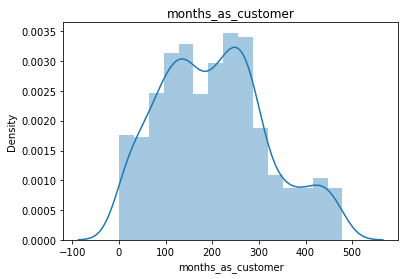

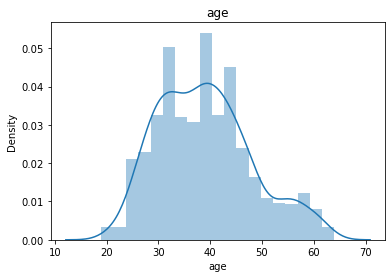

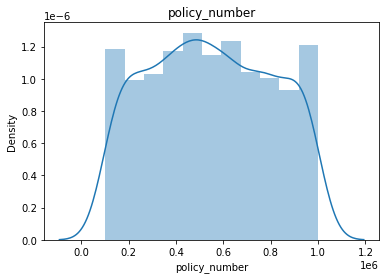

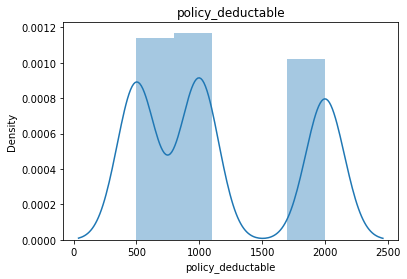

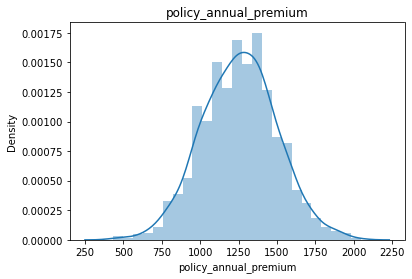

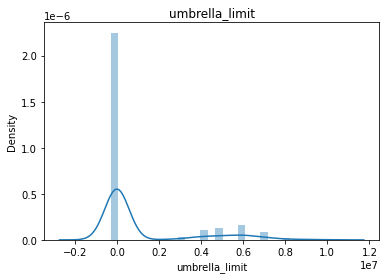

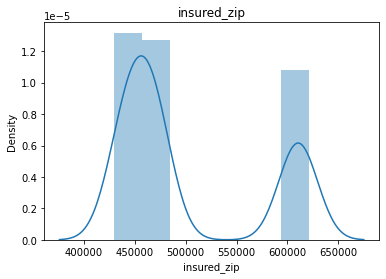

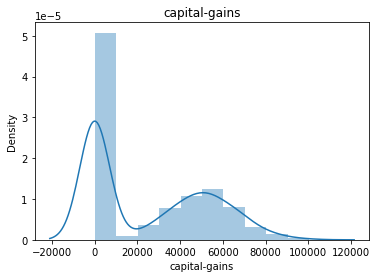

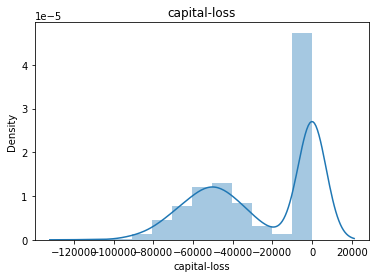

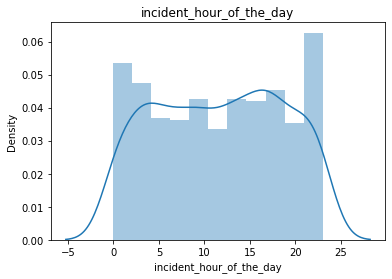

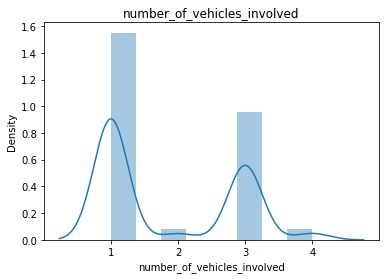

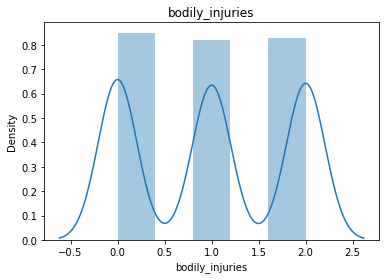

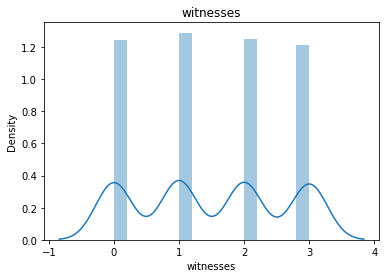

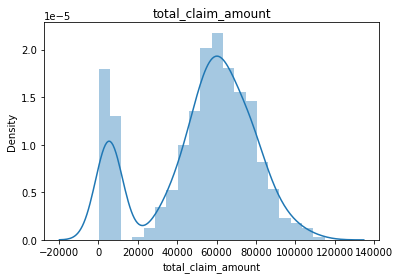

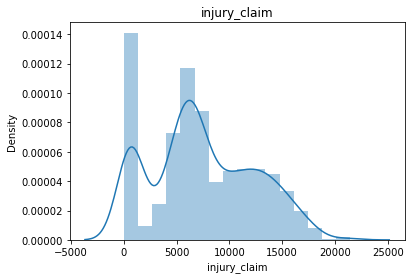

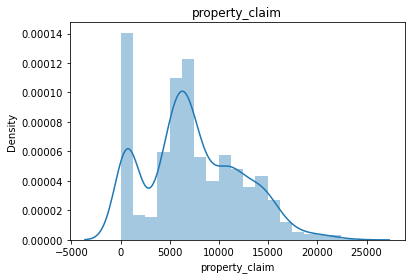

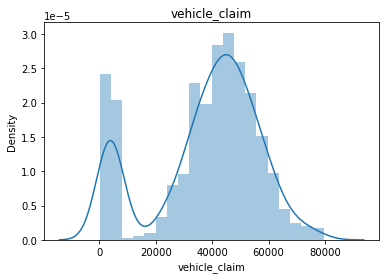

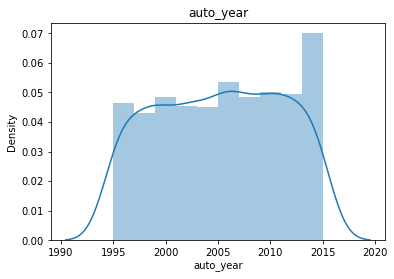

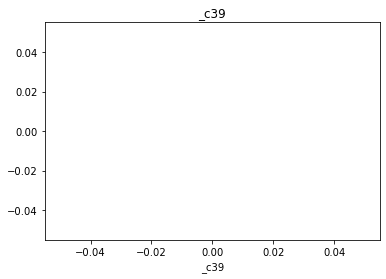

In [36]:
# we will use for loop to plot the graph
# we will use distplot to check the distribution of data
for i in num:
    plt.title(i)
    sns.distplot(insurance[i])
    plt.show()

Observation:
    
    Some column contains right skewed data, some contains left skewed data while some columns data are normally distributed.

#### Outliers

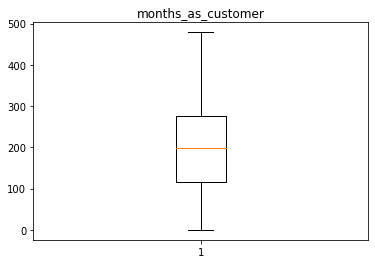

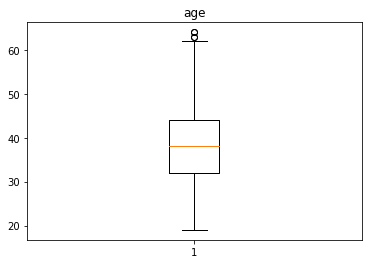

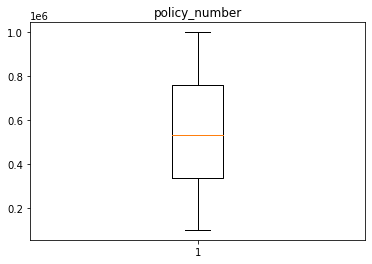

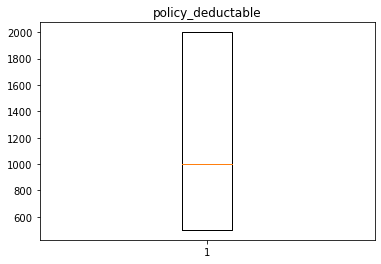

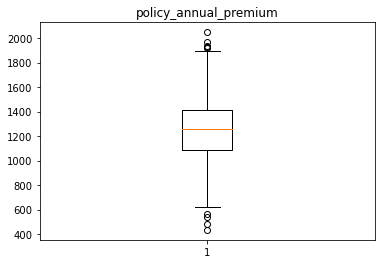

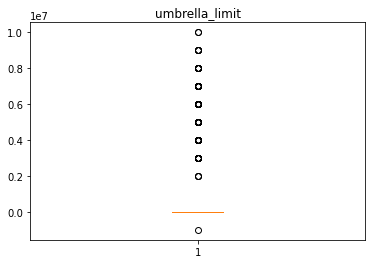

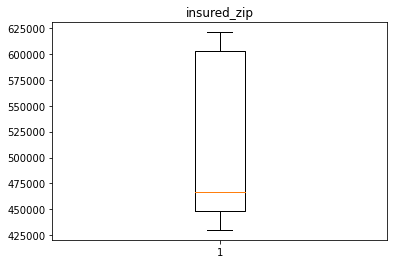

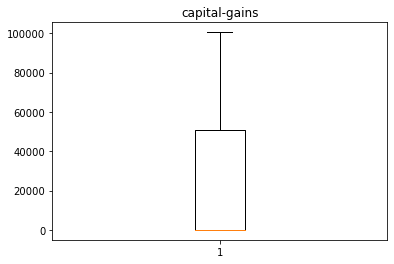

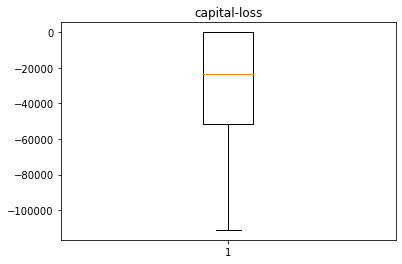

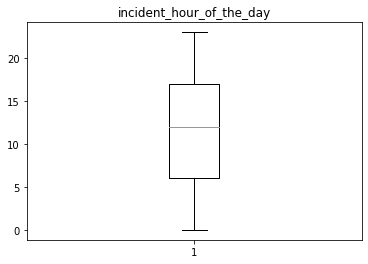

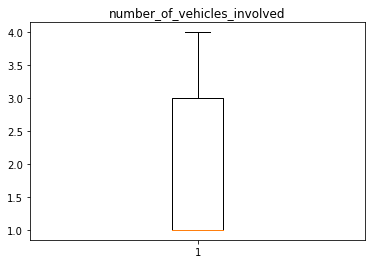

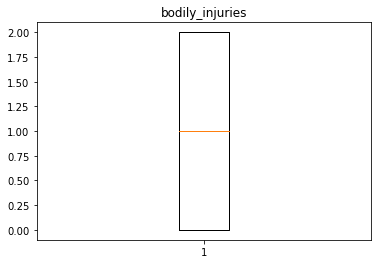

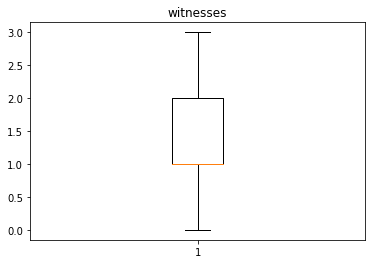

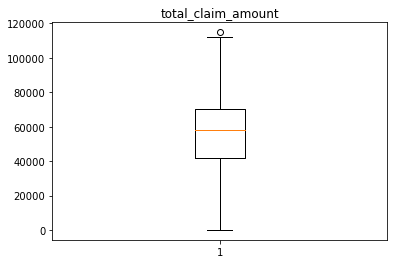

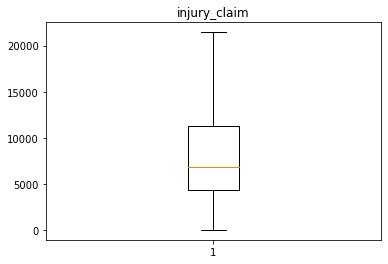

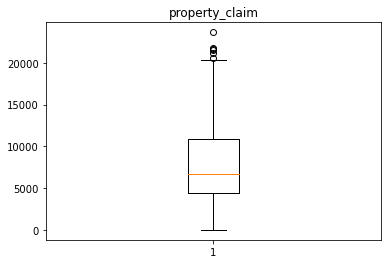

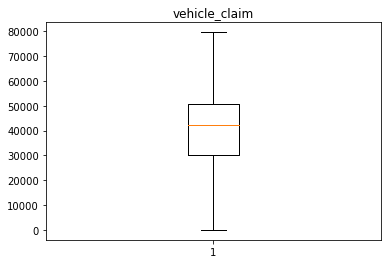

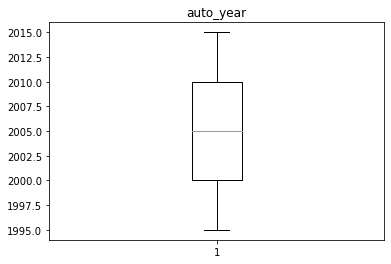

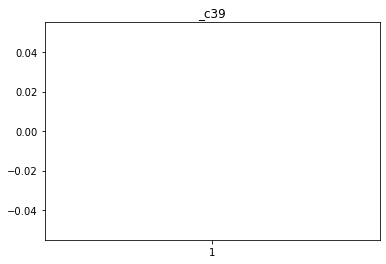

In [37]:
# let's check for outliers present in data
for i in num:
    plt.title(i)
    plt.boxplot(insurance[i])
    plt.show()

*Here we can clearly observe that there are two or 3 columns which contains very few outliers.*

#### Categorical data visualization

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


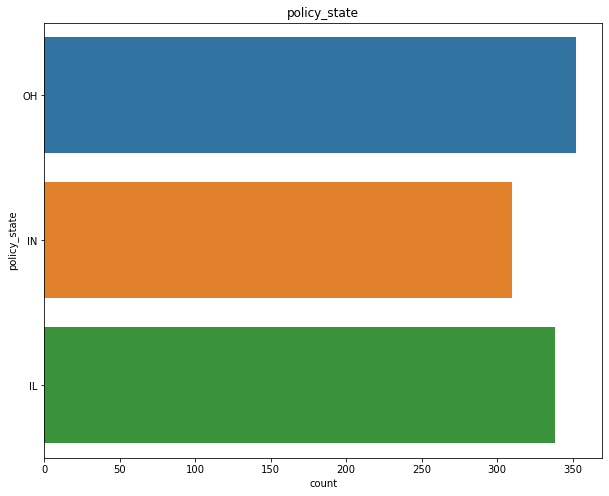





250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


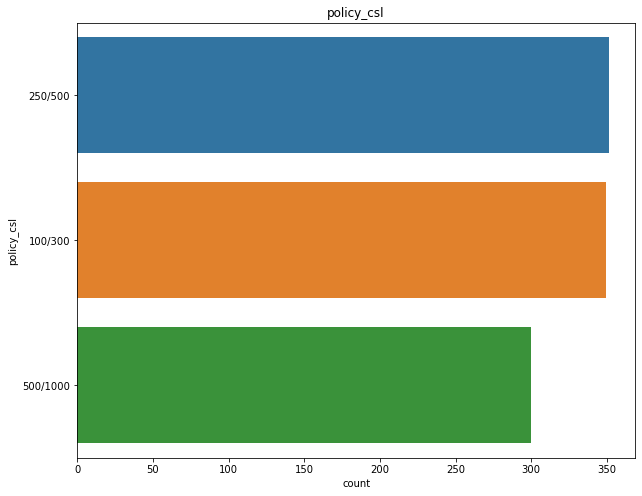





FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


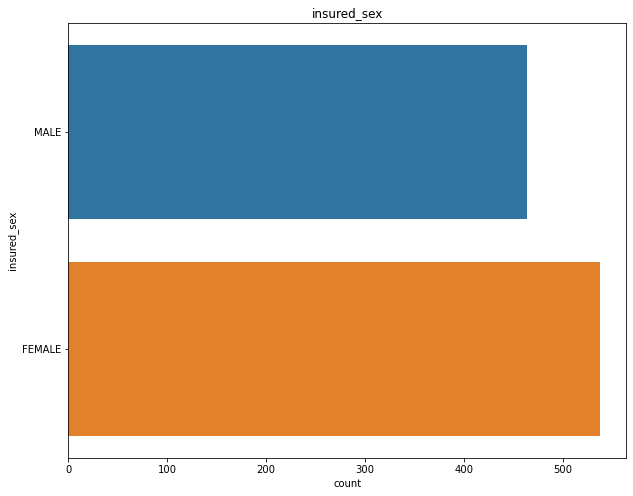





JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


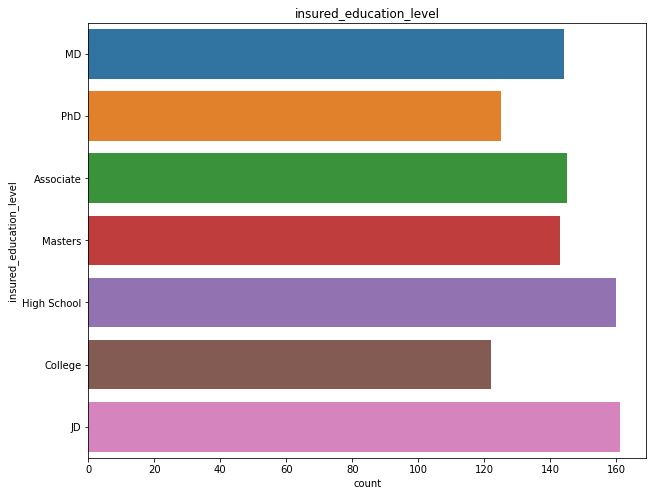





machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


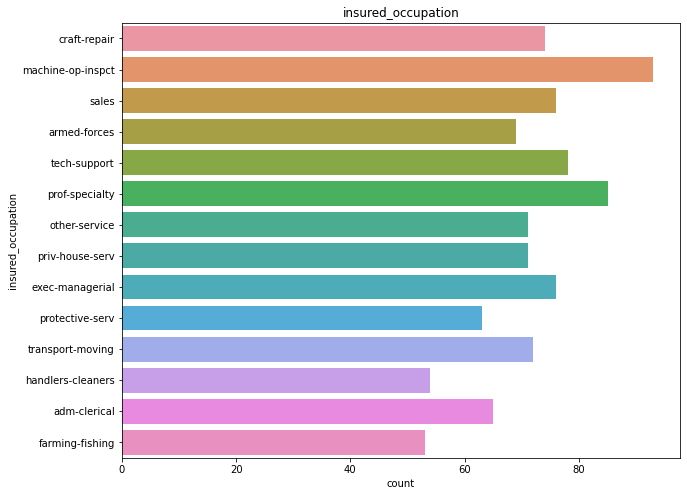





reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


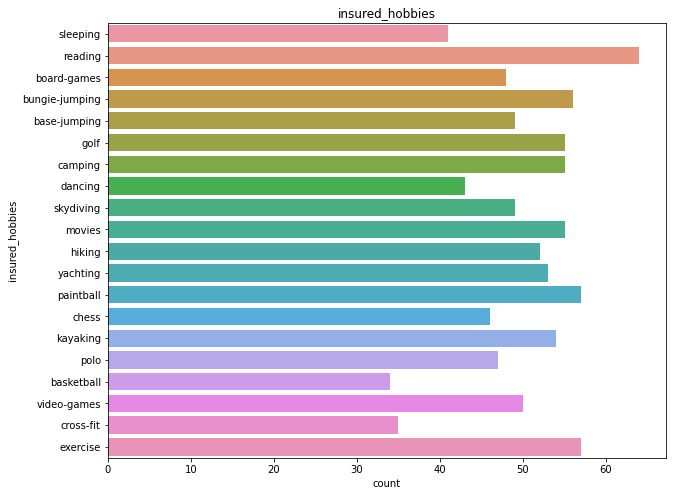





own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


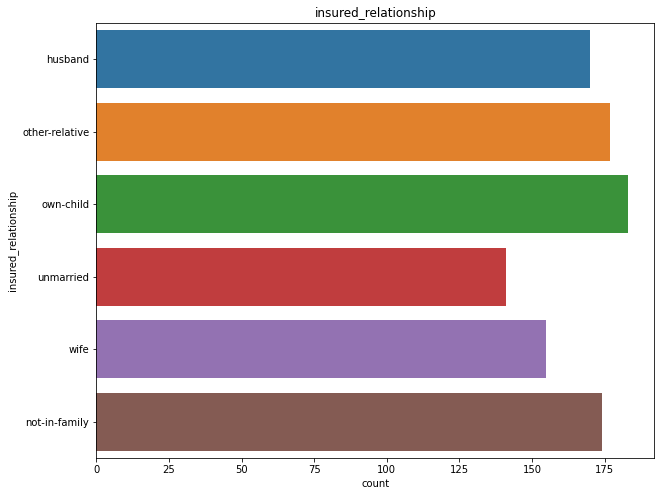





02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015

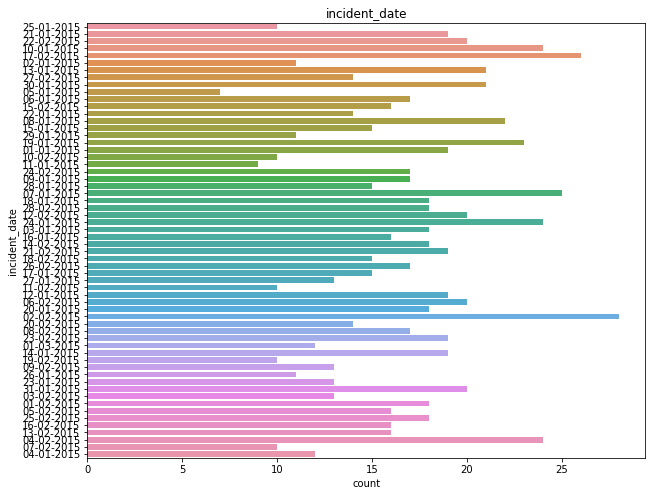





Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


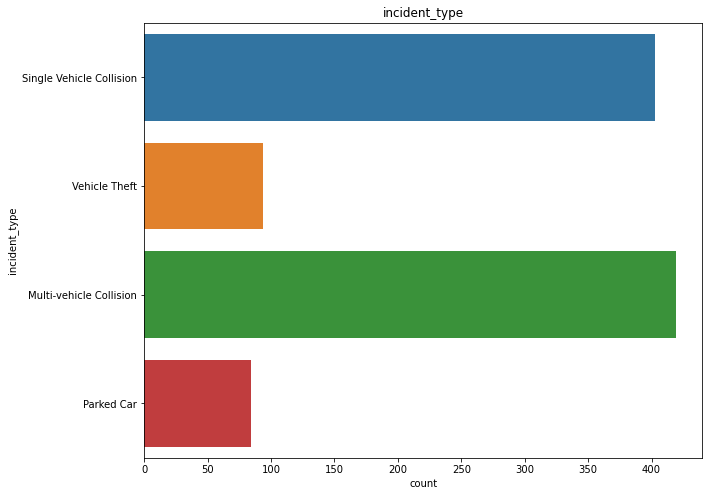





Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


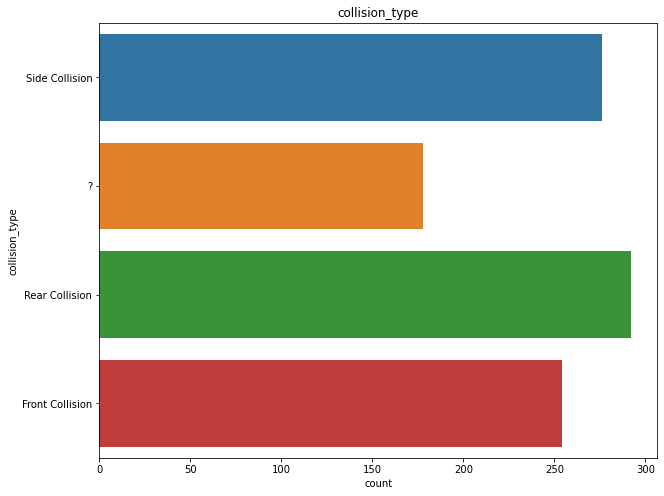





Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


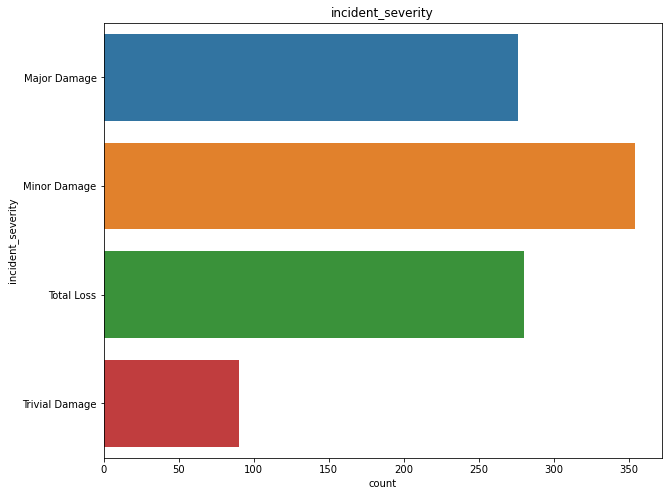





Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


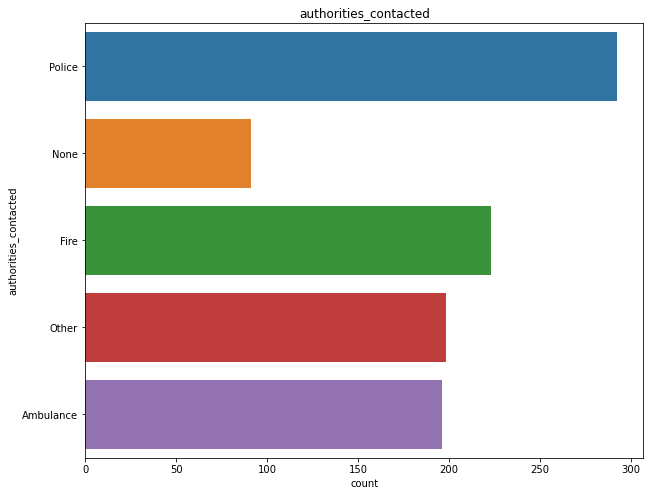





NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


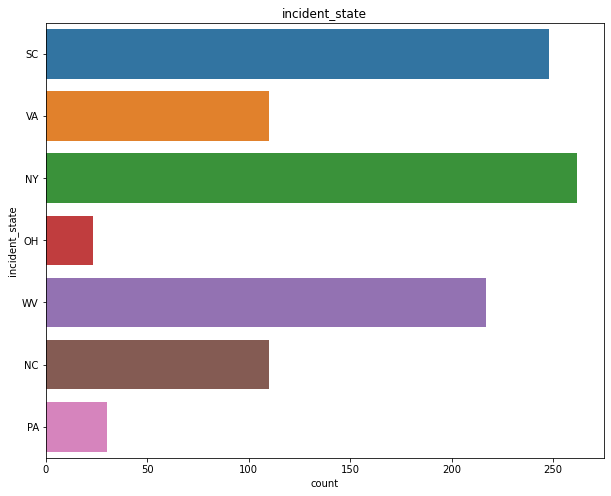





Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


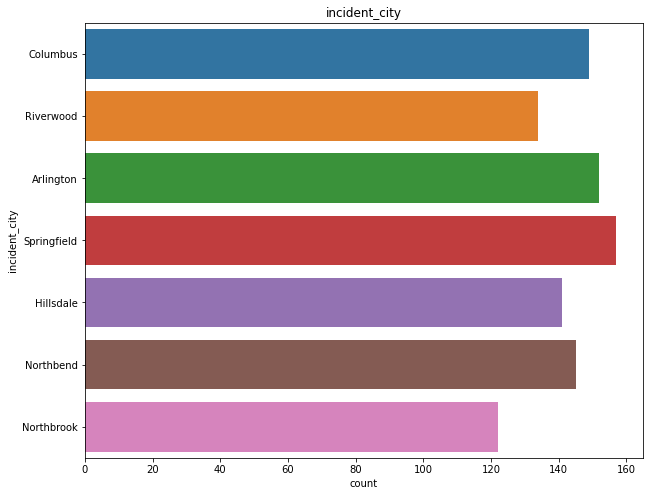





9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64


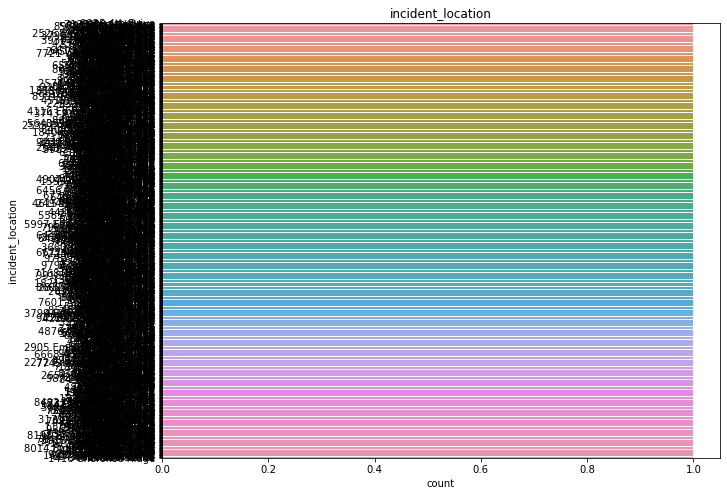





?      360
NO     338
YES    302
Name: property_damage, dtype: int64


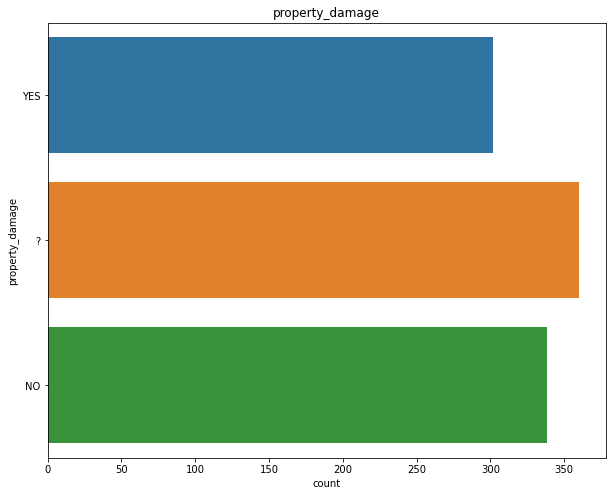





?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


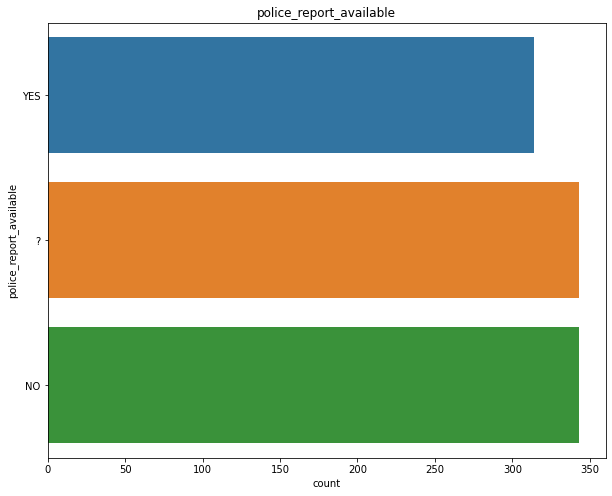





Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


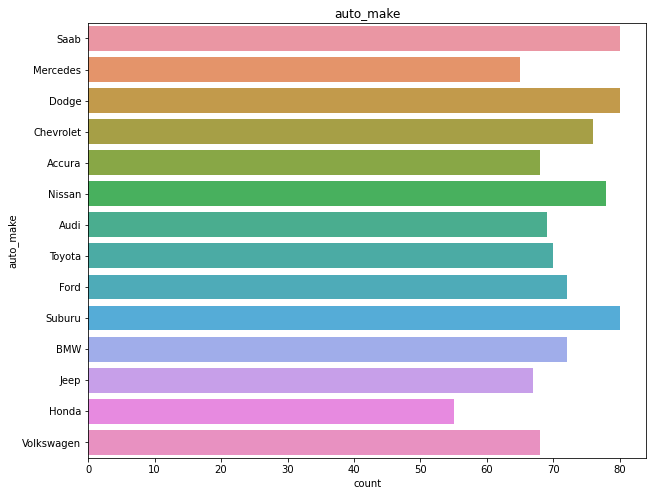





RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


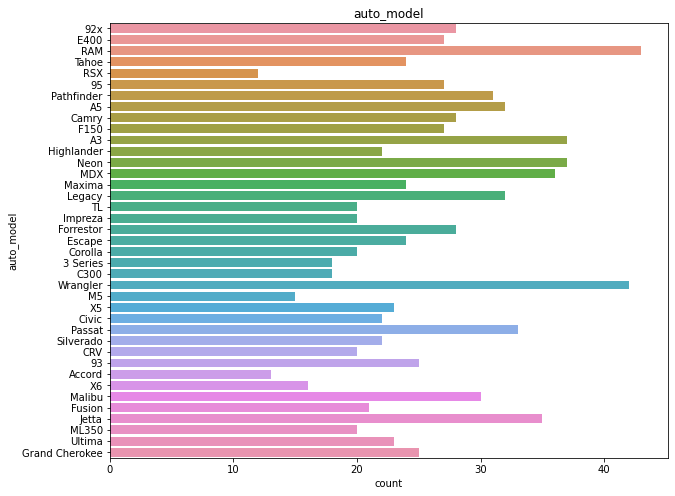





N    753
Y    247
Name: fraud_reported, dtype: int64


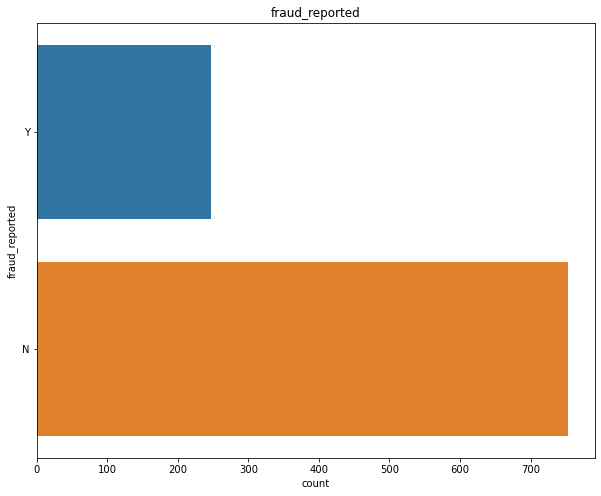

In [40]:
# we will use countplot to check the frequency of different categories
for i in obj[1:]:
    print(insurance[i].value_counts())
    plt.figure(figsize = (10,8))
    plt.title(i)
    sns.countplot(y = i, data = insurance)
    plt.show()
    print('\n')
    print('\n')

Observations:
    
    1: There are more females who have taken an insurance policy.
        
    2: People occupation are mixed but most people occupation is machine-op-inspct who have taken insurance.
        
    3: Many insurance claims made by customers at same date.
        
    4: Vehicle theft and parked car are least incident which happened.
        
    5: Least collision is of some other type.
        
    6: Least incident severity is trivial damage.
        
    7: After most of the incident people contacted with some authority but very few didn't contacted any authority.
        
    8: Least incident happened at OH state.
        
    9: Almost all city incident happened around same rate.
        
    10: Most of the time insurance claim was not fraud.

#### Relation of target column with other numerical columns

Relation between fraud_reported and months_as_customer


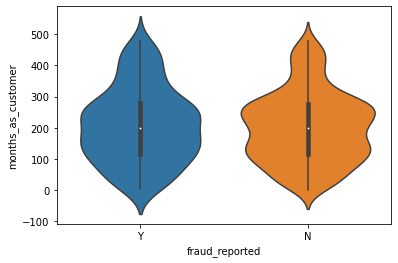


 

Relation between fraud_reported and age


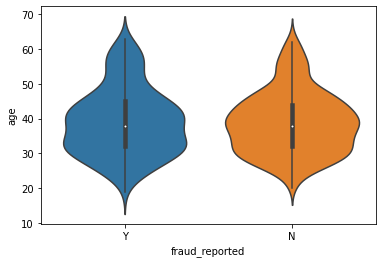


 

Relation between fraud_reported and policy_number


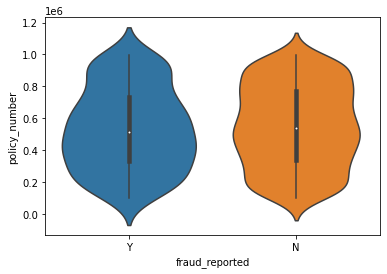


 

Relation between fraud_reported and policy_deductable


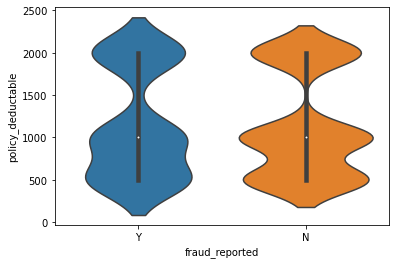


 

Relation between fraud_reported and policy_annual_premium


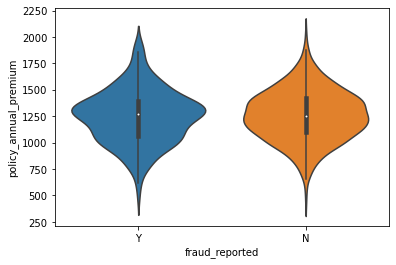


 

Relation between fraud_reported and umbrella_limit


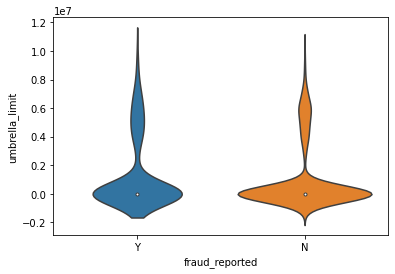


 

Relation between fraud_reported and insured_zip


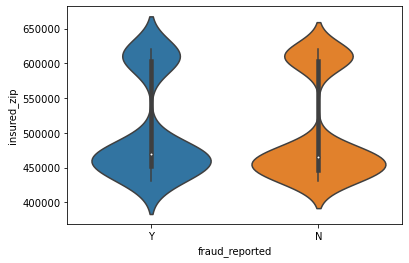


 

Relation between fraud_reported and capital-gains


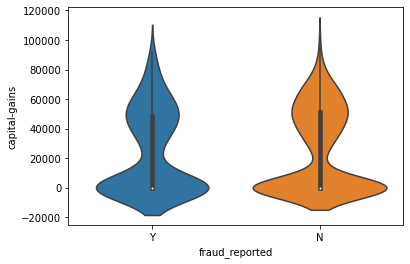


 

Relation between fraud_reported and capital-loss


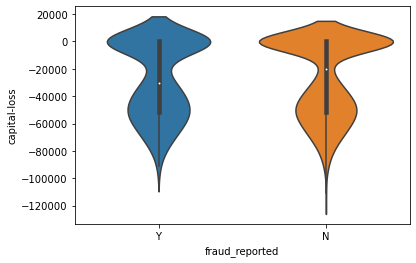


 

Relation between fraud_reported and incident_hour_of_the_day


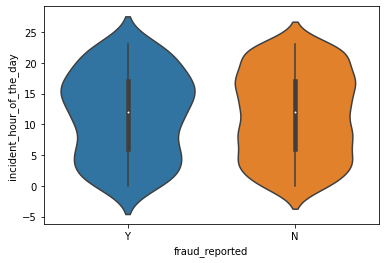


 

Relation between fraud_reported and number_of_vehicles_involved


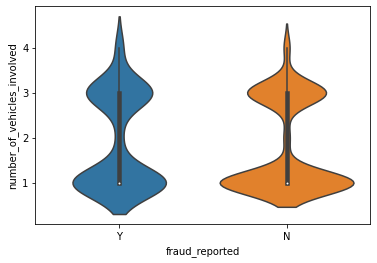


 

Relation between fraud_reported and bodily_injuries


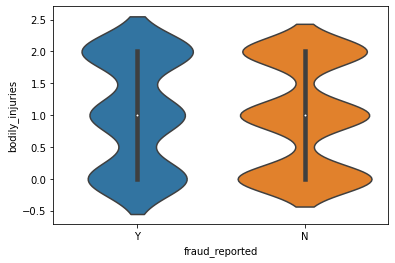


 

Relation between fraud_reported and witnesses


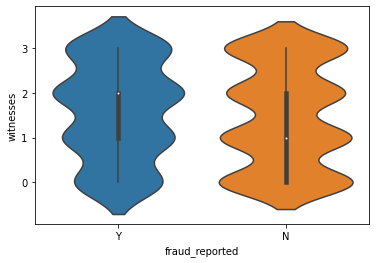


 

Relation between fraud_reported and total_claim_amount


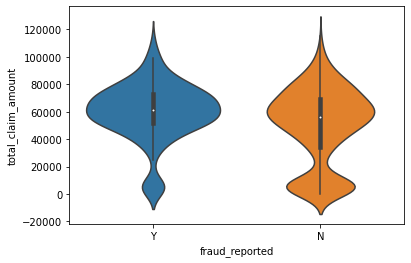


 

Relation between fraud_reported and injury_claim


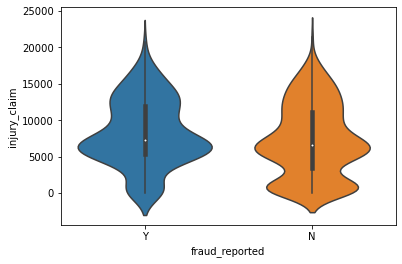


 

Relation between fraud_reported and property_claim


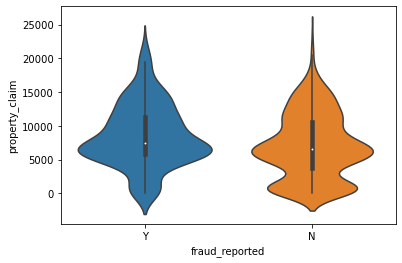


 

Relation between fraud_reported and vehicle_claim


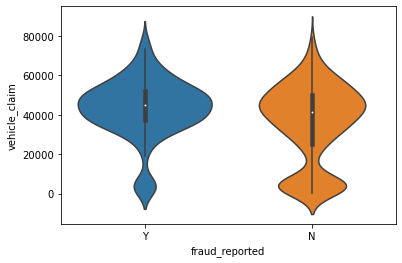


 

Relation between fraud_reported and auto_year


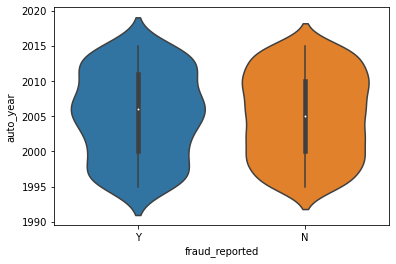


 

Relation between fraud_reported and _c39


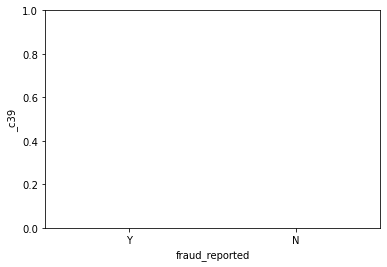

In [43]:
# let's check the relationship of fraud column with other numeric data columns
for i in num:
    print('Relation between fraud_reported and', i)
    sns.violinplot(x = 'fraud_reported', y = i, data = insurance)
    plt.show()
    print('\n','\n')

observations:
    
    1: Most customers pay between 500 to 1000 dollars who have claimed fraud insurance.
        
    2: Most of the fraud insurance claimed are from nearby 450000 zip code area.
        
    3: Most time fraud insurance claimed are said incident hour nearby 15.
    
    4: Most fraud insurance claimed that there is one vehicle involved in incident.
        
    5: When fraud insurance claimed then very less time they said that there is no any witness otherwise they have take 1 to 3 people as witness.
        
    6: People claimed nearby 60000 to 70000 dollars when they reported fraud insurance.

### Feature Engineering

#### Datetime Variables

As we have already seen in two columns of the dataset it contains datetime variables but it is showing as object type so we need to convert them into datetime variables.

In [58]:
# first we will make a copy of the dataset then we will perform operations on it
df = insurance.copy()

In [59]:
# converting 'policy_bind_date' and 'incident_date' columns into datetime variables
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

#### Making a new column

Now we will make a new column in our dataframe which contain the information about difference of days form policy taken to the date of incident.

In [71]:
# findnig the difference of days and holding it into another variable
new = df['incident_date']-df['policy_bind_date']

In [72]:
# adding new column 
df['total_days_without_incident'] = new

In [79]:
# checking if column is added properly or not
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,total_days_without_incident
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,100 days
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,3130 days
2,134,29,687698,2000-06-09,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,5371 days
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-10-01,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,9260 days
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,256 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2015-02-22,2,1,1,1,0,4,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0,8622 days
996,285,41,186934,2014-05-01,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2015-01-24,2,2,0,1,4,3,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0,268 days
997,130,34,918516,2003-02-17,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,2015-01-23,0,3,1,4,0,0,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0,4358 days
998,458,62,533940,2011-11-18,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2015-02-26,2,2,0,3,1,0,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0,1196 days


*Here we can see a new column is added in last of the dataset and it contains information in days.*

In [75]:
# checking data types
df.dtypes

months_as_customer                       int64
age                                      int64
policy_number                            int64
policy_bind_date                datetime64[ns]
policy_state                             int32
policy_csl                               int32
policy_deductable                        int64
policy_annual_premium                  float64
umbrella_limit                           int64
insured_zip                              int64
insured_sex                              int32
insured_education_level                  int32
insured_occupation                       int32
insured_hobbies                          int32
insured_relationship                     int32
capital-gains                            int64
capital-loss                             int64
incident_date                   datetime64[ns]
incident_type                            int32
collision_type                           int32
incident_severity                        int32
authorities_c

*Here we can see the new added column contains data in timedelta data type so we need to convert it into integer and also now we can drop the two columns 'ploicy_bind_date' and 'incident_date'.*

In [80]:
# now we will change the data type of our new column from timedelta to integer
df['total_days_without_incident'] = df['total_days_without_incident'].dt.days

In [82]:
# checking data type
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted             

*Here we can see the datatype is now changed.*

#### Dropping column

As we have seen column 'incident_location' contains 1000 different locations so it will not provide any valuable insight to the model and '_c39' doesn't contains any information so we will drop these columns.

In [60]:
df.drop('incident_location', axis = 1, inplace = True)
df.drop('_c39', axis = 1, inplace = True)

In [85]:
df.drop('policy_bind_date', axis = 1, inplace = True)
df.drop('incident_date', axis = 1, inplace = True)

#### Encoding

In [86]:
# now we will encode all the categorical variables
# first we will make a list of all categorical columns using list concatenation
cat = [i for i in df.columns if df[i].dtype == 'O']

In [87]:
# importing library to encode
# we will use label encoder
from sklearn.preprocessing import LabelEncoder

# making instance of it
le = LabelEncoder()

In [88]:
# sending data to encode them
# we will use for loop to encode them
for i in cat:
    df[i] = le.fit_transform(df[i])

*Now the data is encoded.*

#### Outliers

Let's check for outliers if any.

In [90]:
# importing required library
from scipy.stats import zscore

In [91]:
# checking zscore of all data
zsc = np.abs(zscore(df))

In [92]:
# checking where the zscore value is greater than threshold 3
threshold = 3
np.where(zsc>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 30,  7,  7,  7,  6, 15,
         7,  7,  7], dtype=int64))

*These are the data location which are outlier.*

In [96]:
# removing the outliers
df1 = df[(zsc<3).all(axis = 1)]

# checking shape of dataframe now
df1.shape

(980, 37)

*Here we have seen 20 rows are deleted*

#### Data loss

In [98]:
# checking data loss after outlier removal
data_loss = ((1000-980)/1000)*100
data_loss

2.0

*Here we can see the data loss is 2% which is very minor and it is acceptable.*

#### Over sampling

*As we have seen the target column is biased towards one unique feature so we will balance the dataset.*

In [99]:
# we will use oversampling technique to balance the dataset
from imblearn.over_sampling import SMOTE

# making instance of it 
smt = SMOTE()

In [100]:
df1

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,total_days_without_incident
0,328,48,521585,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,100
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,3130
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,5371
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,9260
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,1,1,1,0,4,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0,8622
996,285,41,186934,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,2,0,1,4,3,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0,268
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,3,1,4,0,0,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0,4358
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,2,0,3,1,0,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0,1196


In [102]:
# now we will split the data into input and target 
x = df1.drop('fraud_reported', axis = 1)
y = df1.iloc[ : , -2]

In [105]:
# checking shape of input and target data shape
print('Input data shape:', x.shape)
print('Target data shape:', y.shape)

Input data shape: (980, 36)
Target data shape: (980,)


In [106]:
# sending data for balancing
in_x, out_y = smt.fit_resample(x,y)

In [107]:
# now checking shape of new balanced data
print('Input data shape:', in_x.shape)
print('Target data shape:', out_y.shape)

Input data shape: (1480, 36)
Target data shape: (1480,)


*Here we can see now number of rows are increased as it has made synthetic rows.*

In [108]:
# checking frequency of unique features of target column
out_y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

*Here we can see now both came in same shape.*

#### Scaling of data

As we have seen our data is not in same scale so we will scale the data.

In [109]:
# we will use standard scaler to scale our data

# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [110]:
# applying scaling to input data
scaled = ssc.fit_transform(in_x)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = in_x.columns)

*As our data is now came in same scale now it is ready to go for model training.*

### Model Building

In [113]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split   # to split the data for training and testing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
# making instance of every model
lo_reg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#### Random State

In [115]:
# first we will find the best random state to split our data

max_acc = 0
# making a variable max_acc and initialising it with 0 we will store the maximum accuracy in it
best_rs = 0
# making a variable best_rs and initialising it with 0 we will store the best random state in it for which maximum accuracy is 
# achieved

# using a for loop to split data into 100 different random states
for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = i )
    # taking 25% data for testing
    
    # training Logistic Regression model
    lo_reg.fit(x_train, y_train)
    
    # making prediction on test data
    pred = lo_reg.predict(x_test)
    
    # checking accuracy
    accuracy = accuracy_score(pred, y_test)
    
    print('At random state', i, 'accuracy score is', accuracy)
    
    
    # using if condition to store the best accuracy and random state
    if accuracy>max_acc:
        max_acc = accuracy
        best_rs = i
    
print('Maximum accuracy is', max_acc,'and best random state is', best_rs)

At random state 1 accuracy score is 0.8243243243243243
At random state 2 accuracy score is 0.8297297297297297
At random state 3 accuracy score is 0.7756756756756756
At random state 4 accuracy score is 0.8108108108108109
At random state 5 accuracy score is 0.8162162162162162
At random state 6 accuracy score is 0.7675675675675676
At random state 7 accuracy score is 0.8108108108108109
At random state 8 accuracy score is 0.7567567567567568
At random state 9 accuracy score is 0.8135135135135135
At random state 10 accuracy score is 0.8081081081081081
At random state 11 accuracy score is 0.8324324324324325
At random state 12 accuracy score is 0.7837837837837838
At random state 13 accuracy score is 0.7675675675675676
At random state 14 accuracy score is 0.8081081081081081
At random state 15 accuracy score is 0.7675675675675676
At random state 16 accuracy score is 0.7918918918918919
At random state 17 accuracy score is 0.8081081081081081
At random state 18 accuracy score is 0.8135135135135135
A

*Here we can see at random state 86 model is giving highest accuracy 85%.*

#### Splitting the data

In [116]:
# splitting the data at random state 86
x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = 86)

# taking 25% of data for testing

In [117]:
# checking testing and training data shape
print('Input training data shape:', x_train.shape)
print('Target training data shape:', y_train.shape)
print('Input test data shape:', x_test.shape)
print('Target test data shape:', y_test.shape)

Input training data shape: (1110, 36)
Target training data shape: (1110,)
Input test data shape: (370, 36)
Target test data shape: (370,)


#### Selecting a model

In [118]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [lo_reg, svc, dtc, knn, rfc, gnb]

# using for loop to train all models

for model in model:
    model.fit(x_train, y_train)
    
    # making predictions
    pred = model.predict(x_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, y_test)
    
    # classification report
    clf_report = classification_report(pred, y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model LogisticRegression() :
Accuracy score: 0.8567567567567568
Confusion matrix:
 [[174  24]
 [ 29 143]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       198
           1       0.86      0.83      0.84       172

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370




Evaluation of model SVC() :
Accuracy score: 0.9
Confusion matrix:
 [[187  21]
 [ 16 146]]
Classification report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       208
           1       0.87      0.90      0.89       162

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370




Evaluation of model DecisionTreeClassifier() :
Accuracy score: 0.8351351351351352
Co

*Here by analysing all models and its metrics we can see Random Forest is working very well as it is giving highest accuracy and less error.*

#### Final Model Training

As Random Forest is giving highest accuracy so we will train that model as our final model.

In [119]:
# sending data to the best model for training
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
# making predictions on test data
pred = rfc.predict(x_test)

In [121]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, y_test))

Accuracy score: 0.9108108108108108


*Model's accuracy is 91%.*

In [122]:
# checking confusion matrix
print('Confusion matrix:\n', confusion_matrix(pred, y_test))

Confusion matrix:
 [[181  11]
 [ 22 156]]


*Here we can see there is very less values in false positive rate and false negative rate.*

In [123]:
# checking cassification report
print('Classification report:\n', classification_report(pred, y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       192
           1       0.93      0.88      0.90       178

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



*Model's overall accuracy is 91%.*

### Model Evaluation

#### Cross Validation

In [124]:
# importing required model
from sklearn.model_selection import cross_val_score

In [125]:
# using for loop to split data at different cross folds and checking their mean score
for i in range(2,15):
    score = cross_val_score(rfc, input_x, out_y, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.8412162162162162
At cross fold 3 mean score is 0.8365853391475255
At cross fold 4 mean score is 0.8554054054054054
At cross fold 5 mean score is 0.8601351351351351
At cross fold 6 mean score is 0.859550376880287
At cross fold 7 mean score is 0.8609752047112326
At cross fold 8 mean score is 0.8608108108108108
At cross fold 9 mean score is 0.8704648107087132
At cross fold 10 mean score is 0.866891891891892
At cross fold 11 mean score is 0.8691090004522839
At cross fold 12 mean score is 0.870552495847539
At cross fold 13 mean score is 0.873741535595285
At cross fold 14 mean score is 0.8670709793351303


*Here we can see there is not very much difference between model's accuracy score and mean score at different cross folds. That means our model is learning the data insights very well.*

#### Hyperparameter tuning

*Let's do hyperparameter tuning to check whether our model's performance is some improve or not.*

In [126]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [127]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning and passing model and parameters
gsv = GridSearchCV(rfc, params)

In [128]:
# sending data for training at different parameters
gsv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [129]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
Best score: 0.8648648648648649


*Here we can see at best parameters model is giving highest 86% accuracy which is less than the model we trained. So we will finalize that model and save that.*

#### AUC_ROC Curve

In [130]:
# importing required libraries for it
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [131]:
# using predict_proba function for model RandomForestClassifier to predict the occurance of 1
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [132]:
# now we will use these predicted probability to find fpr (false positive rate), tpr (True Positive rate) and threshold values

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

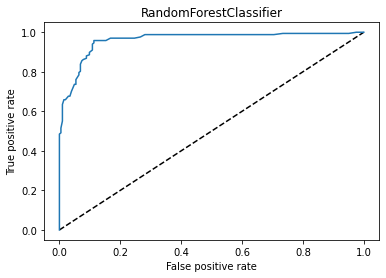

In [133]:
# making auc_roc curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title('RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

*This is showing AUC_ROC curve of our model. Where it is showing the model prediction error as True positive rate and False positive rate.*

In [134]:
# checking roc_score
score = roc_auc_score(y_test, rfc.predict(x_test))
score

0.9128786761452465

*Model's score is 91%.*

### Saving the best model

In [136]:
import pickle

In [138]:
# making file to save the model in it
filename = 'insurance_claim_fraud.obj'

In [139]:
# dumping the model in that file
pickle.dump(rfc, open(filename, 'wb'))

### Loading the model

In [141]:
fraud = pickle.load(open('insurance_claim_fraud.obj', 'rb'))

In [142]:
# making prediction on test data
pred = fraud.predict(x_test)

In [143]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.9108108108108108

*Here we can see we have saved the best model and it is giving 91% accuracy.*

In [144]:
# making dataframe of predictions
pd.DataFrame([fraud.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369
Predicted,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0
Original,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0


*In this dataframe we can see the model is predicting quite well it is making very few wrong predictions.

In [145]:
# making dataframe of predictions of training data
pd.DataFrame([fraud.predict(x_train)[:], y_train[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

*In training data also we can see the model is making almost right predictions.